In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df= pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
y=df['math_score']

In [6]:
# Column Transformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [10]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    R2_score = r2_score(true,predicted)
    return mae , rmse ,R2_score

In [12]:
models = {
    "Liner Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()    
    }
model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse , model_train_R2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse , model_test_R2 = evaluate_model(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("-Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("-R2 Score : {:.4f}".format(model_train_R2))
    
    
    print('---------------------------------------------------------------')
    
    
    
    print('Model Performance for Test set')
    print("-Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("-R2 Score : {:.4f}".format(model_test_R2))
    
    r2_list.append(model_test_R2)
    
    print('='*35)
    print('\n')
    


Liner Regression
Model performance for Training set
-Root Mean Squared Error : 5.3240
-Mean Absolute Error : 4.2691
-R2 Score : 0.8743
---------------------------------------------------------------
Model Performance for Test set
-Root Mean Squared Error : 5.3773
-Mean Absolute Error : 4.2053
-R2 Score : 0.8812


Lasso
Model performance for Training set
-Root Mean Squared Error : 6.5938
-Mean Absolute Error : 5.2063
-R2 Score : 0.8071
---------------------------------------------------------------
Model Performance for Test set
-Root Mean Squared Error : 6.5197
-Mean Absolute Error : 5.1579
-R2 Score : 0.8253


Ridge
Model performance for Training set
-Root Mean Squared Error : 5.3233
-Mean Absolute Error : 4.2650
-R2 Score : 0.8743
---------------------------------------------------------------
Model Performance for Test set
-Root Mean Squared Error : 5.3904
-Mean Absolute Error : 4.2111
-R2 Score : 0.8806


K-Neighbors Regressor
Model performance for Training set
-Root Mean Squared E

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=True)

,Model Name,R2_Score
4,Decision Tree,0.744348
3,K-Neighbors Regressor,0.784518
1,Lasso,0.825320
5,XGBoost,0.827797
7,AdaBoostRegressor,0.847398
6,CatBoostRegressor,0.851632
2,Ridge,0.880593
0,Liner Regression,0.881171


# Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


Text(0, 0.5, 'Predicted')

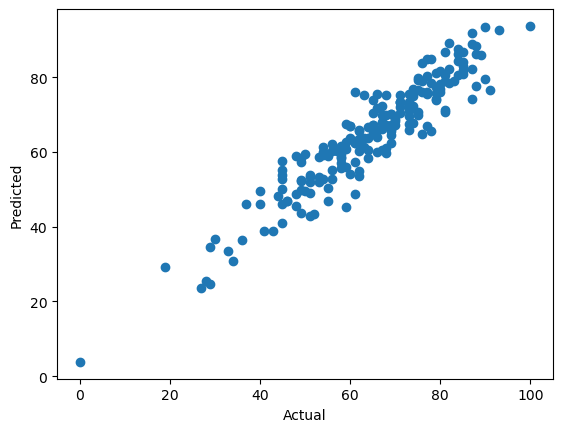

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

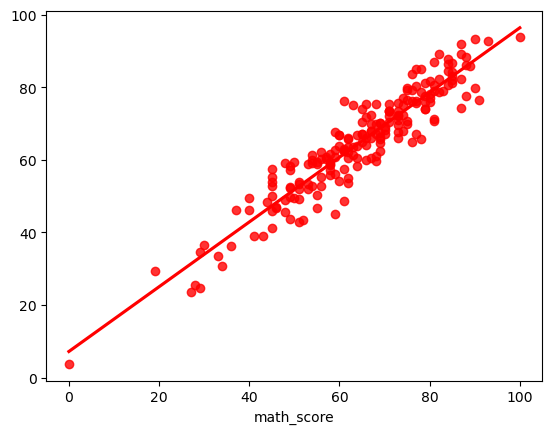

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color = 'red')

In [22]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.796875,-5.796875
740,80,76.976562,3.023438
660,74,76.984375,-2.984375
411,84,87.664062,-3.664062
...,...,...,...
408,52,43.367188,8.632812
332,62,62.156250,-0.156250
208,74,67.812500,6.187500
613,65,67.125000,-2.125000
